# **Online Retail Transactions Analysis**

## Objectives

* This notebook analyzes online retail transaction data to understand customer behavior, identify popular products, and optimize business strategies. The analysis provides actionable insights for improving sales, marketing effectiveness, and customer retention.

## Inputs

* online_retail_sales.csv
* online_retail_returns.csv
* online_retail_clean.csv

## Outputs

* Business Performance Analysis 
* Seasonal Patterns Analysis
* Customer Insights Analysis
* Product Performance Analysis



We need to Load the data from the processed data sets reside within data directory

In [85]:
import os
import pandas as pd

# Data directory paths
data_path = os.path.join("..", "data")

df_clean = pd.read_csv(os.path.join(data_path, "online_retail_clean.csv"), low_memory=False)
print(f"Original dataset shape: {df_clean.shape}")

df_sales = pd.read_csv(os.path.join(data_path, "online_retail_sales.csv"), low_memory=False)
print(f"Original dataset shape: {df_sales.shape}")

df_returns = pd.read_csv(os.path.join(data_path, "online_retail_returns.csv"), low_memory=False)
print(f"Original dataset shape: {df_returns.shape}")

Original dataset shape: (536637, 14)
Original dataset shape: (526052, 14)
Original dataset shape: (9249, 14)


We need to set data types

In [86]:
#Set Data Types - df_clean
df_clean['InvoiceNo'] = df_clean['StockCode'].astype('string')
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])  
df_clean['StockCode'] = df_clean['StockCode'].astype('string')
df_clean['Description'] = df_clean['Description'].astype('string')
df_clean['Country'] = df_clean['Country'].astype('category')
df_clean['Weekday'] = df_clean['Weekday'].astype('category')

#Set Data Types - df_sales
df_sales['InvoiceNo'] = df_sales['StockCode'].astype('string')
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])
df_sales['StockCode'] = df_sales['StockCode'].astype('string')
df_sales['Description'] = df_sales['Description'].astype('string')
df_sales['Country'] = df_sales['Country'].astype('category')
df_sales['Weekday'] = df_sales['Weekday'].astype('category')

#Set Data Types - df_return
df_returns['InvoiceNo'] = df_returns['StockCode'].astype('string')
df_returns['InvoiceDate'] = pd.to_datetime(df_returns['InvoiceDate'])
df_returns['StockCode'] = df_returns['StockCode'].astype('string')
df_returns['Description'] = df_returns['Description'].astype('string')
df_returns['Country'] = df_returns['Country'].astype('category')
df_returns['Weekday'] = df_returns['Weekday'].astype('category')


# Business Performance

Business Performance 
- Analysis Period
- Gross Sales Revenue
- Total Returns Value
- Net Revenue
- Return Rate
- Average Transaction Value
- Total Transactions
- Sales Transactions
- Return Transactions
- Unique Customers
- Unique Products
- Countries

In [88]:
   
# Calculate key metrics
total_sales_revenue = df_sales['Revenue'].sum()
total_returns_value = abs(df_returns['Revenue'].sum())
net_revenue = total_sales_revenue - total_returns_value
avg_transaction_value = df_sales['Revenue'].mean()
return_rate = (total_returns_value / total_sales_revenue) * 100

# Display statistics
print(f"Analysis Period: {df_clean['InvoiceDate'].min().date()} to {df_clean['InvoiceDate'].max().date()}")
print(f"Gross Sales Revenue: £{total_sales_revenue:,.2f}")
print(f"Total Returns Value: £{total_returns_value:,.2f}")
print(f"Net Revenue: £{net_revenue:,.2f}")
print(f"Return Rate: {return_rate:.1f}%")
print(f"Average Transaction Value: £{avg_transaction_value:.2f}")
print(f"Total Transactions: {len(df_clean):,}")
print(f"Sales Transactions: {len(df_sales):,}")
print(f"Return Transactions: {len(df_returns):,}")
print(f"Unique Customers: {df_clean['CustomerID'].nunique():,}")
print(f"Unique Products: {df_clean['StockCode'].nunique():,}")
print(f"Countries: {df_clean['Country'].nunique()}")

Analysis Period: 2010-12-01 to 2011-12-09
Gross Sales Revenue: £10,374,333.48
Total Returns Value: £648,326.53
Net Revenue: £9,726,006.95
Return Rate: 6.2%
Average Transaction Value: £19.72
Total Transactions: 536,637
Sales Transactions: 526,052
Return Transactions: 9,249
Unique Customers: 4,371
Unique Products: 4,069
Countries: 38


Business Performance 
- Is there a positive relationship between sales Qunatity and Revenue 
- Contry wise sales 

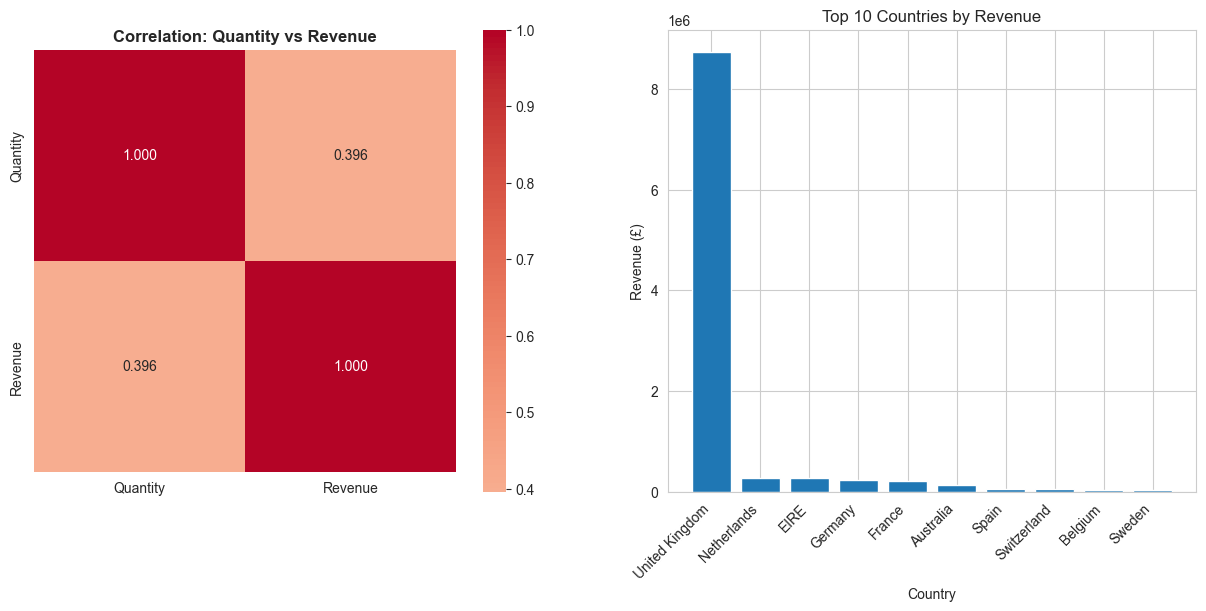

<Figure size 800x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Transaction type distribution
corr = df_sales[['Quantity', 'Revenue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, 
            annot=True,          # Add correlation values
            fmt='.3f',           # Format to 3 decimal places
            cmap='coolwarm',     # Color scheme
            center=0,            # Center colormap at 0
            square=True,         # Square cells
            ax=axes[0])          # Specify which subplot to use
axes[0].set_title('Correlation: Quantity vs Revenue', fontweight='bold')


# Revenue by country (top 10)
country_revenue = df_sales.groupby('Country',observed=True)['Revenue'].sum().sort_values(ascending=False).head(10)
axes[1].bar(range(len(country_revenue)), country_revenue.values)
axes[1].set_title('Top 10 Countries by Revenue')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Revenue (£)')
axes[1].set_xticks(range(len(country_revenue)))
axes[1].set_xticklabels(country_revenue.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Seasonal Patterns Analysis

Monthly Sales Treands

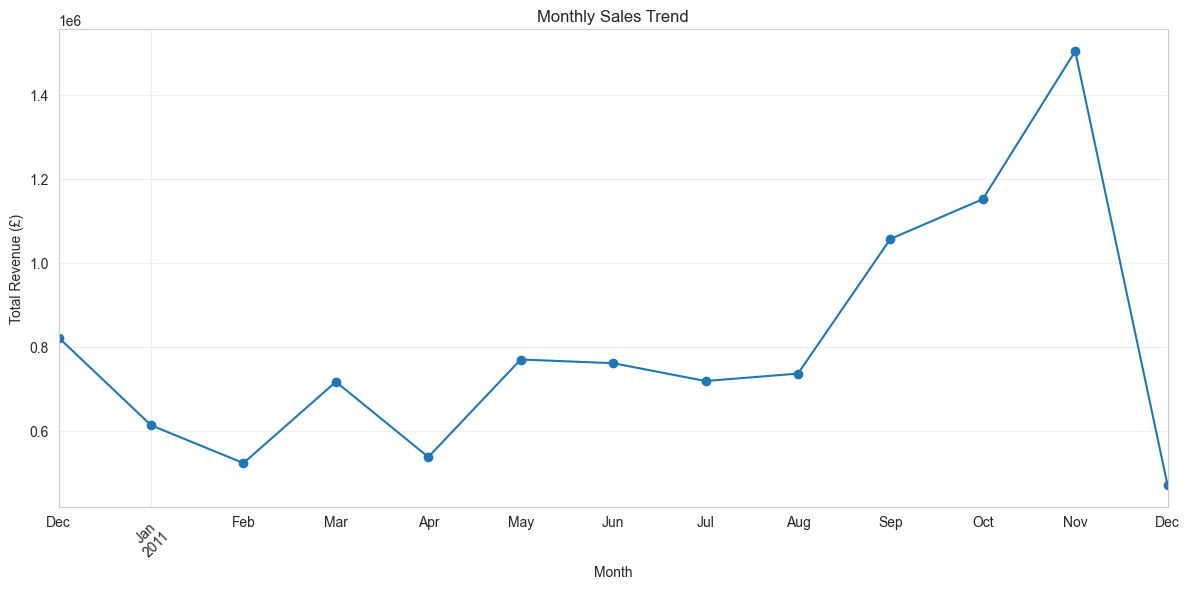

In [91]:
# Monthly sales trend
monthly_sales = df_sales.groupby([df_sales['InvoiceDate'].dt.to_period('M')])['Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Daily Sales Patterns

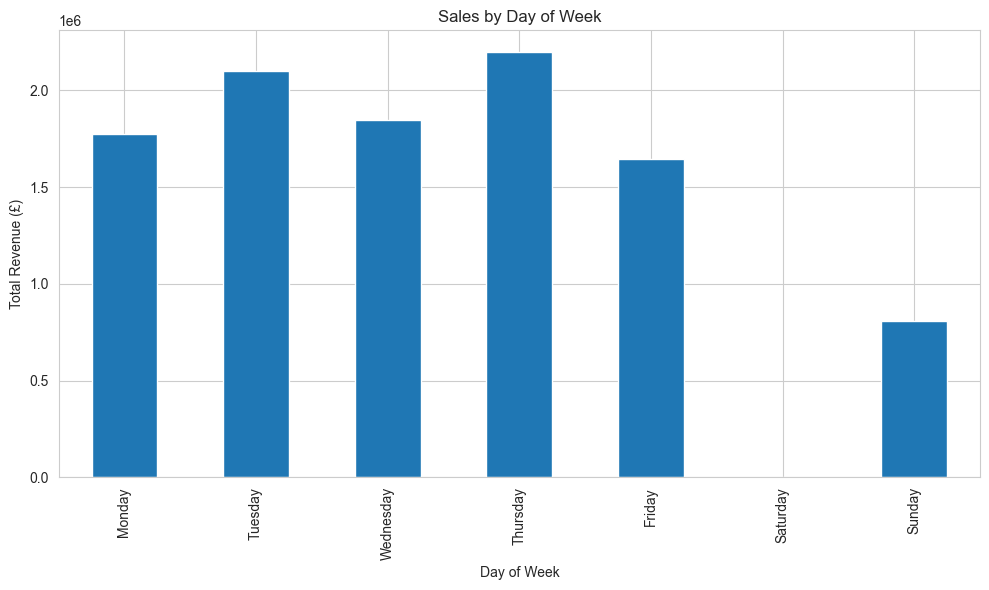

In [92]:
# Daily sales pattern
daily_pattern = df_sales.groupby(df_sales['Weekday'].astype(str))['Revenue'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern = daily_pattern.reindex(days_order)

plt.figure(figsize=(10, 6))
daily_pattern.plot(kind='bar')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

Monthly Sales and Return Treands

<Figure size 1400x800 with 0 Axes>

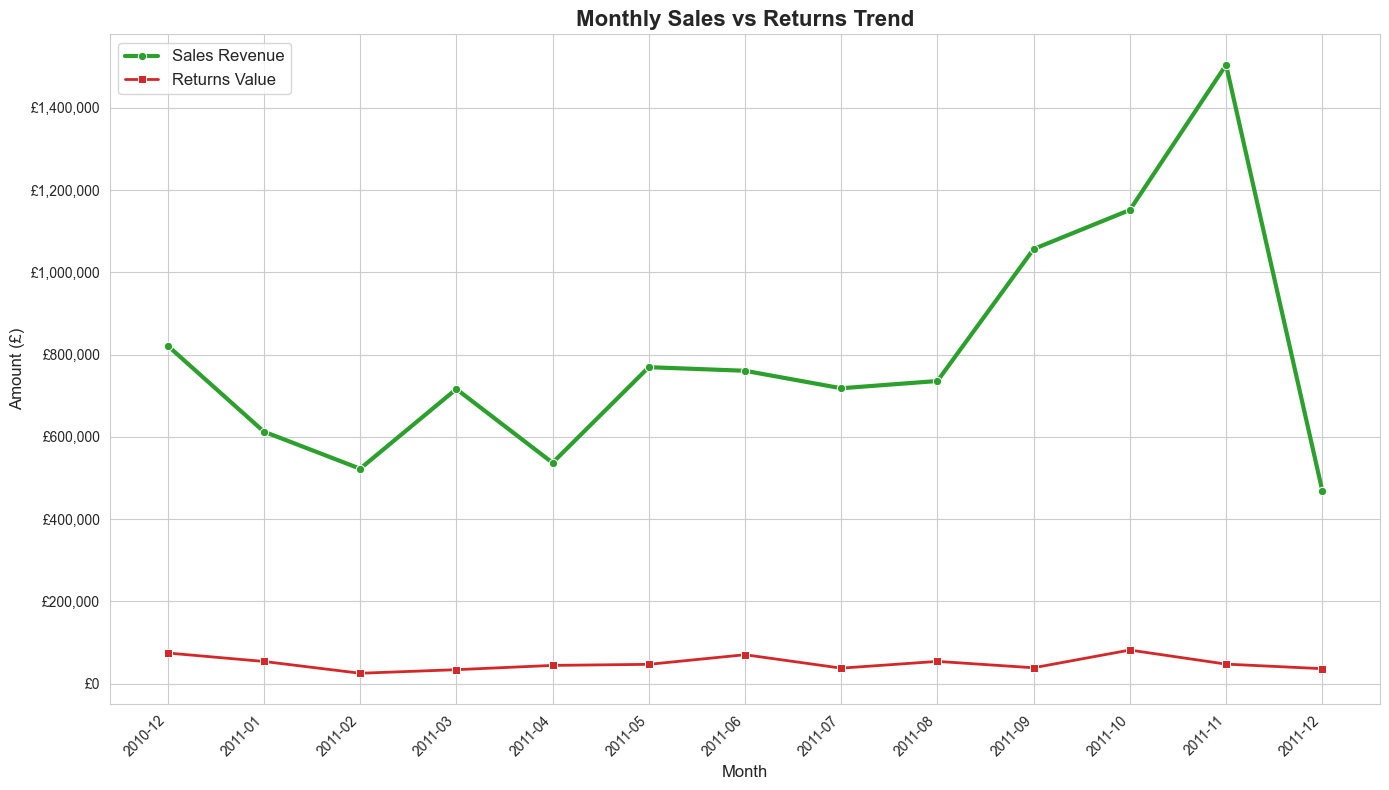

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly trends
monthly_sales = df_sales.groupby(df_sales['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
monthly_returns = df_returns.groupby(df_returns['InvoiceDate'].dt.to_period('M'))['Revenue'].sum().abs()

# Create chart
plt.figure(figsize=(14, 8))

# Convert period index to string for plotting
months = monthly_sales.index.astype(str)

# Plot sales trend
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create a DataFrame for easier plotting
trend_data = pd.DataFrame({
    'Month': monthly_returns.index.astype(str),
    'Sales_Revenue': monthly_sales.values,
    'Returns_Value': monthly_returns.values
})

# Plot using Seaborn lineplot
sns.lineplot(data=trend_data, x='Month', y='Sales_Revenue', 
             label='Sales Revenue', color='#2CA02C', linewidth=3, marker='o')
sns.lineplot(data=trend_data, x='Month', y='Returns_Value', 
             label='Returns Value', color='#D62728', linewidth=2, marker='s')

plt.title('Monthly Sales vs Returns Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x:,.0f}'))
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Customer Insights Analysis

Top 10 Customers by Revenue

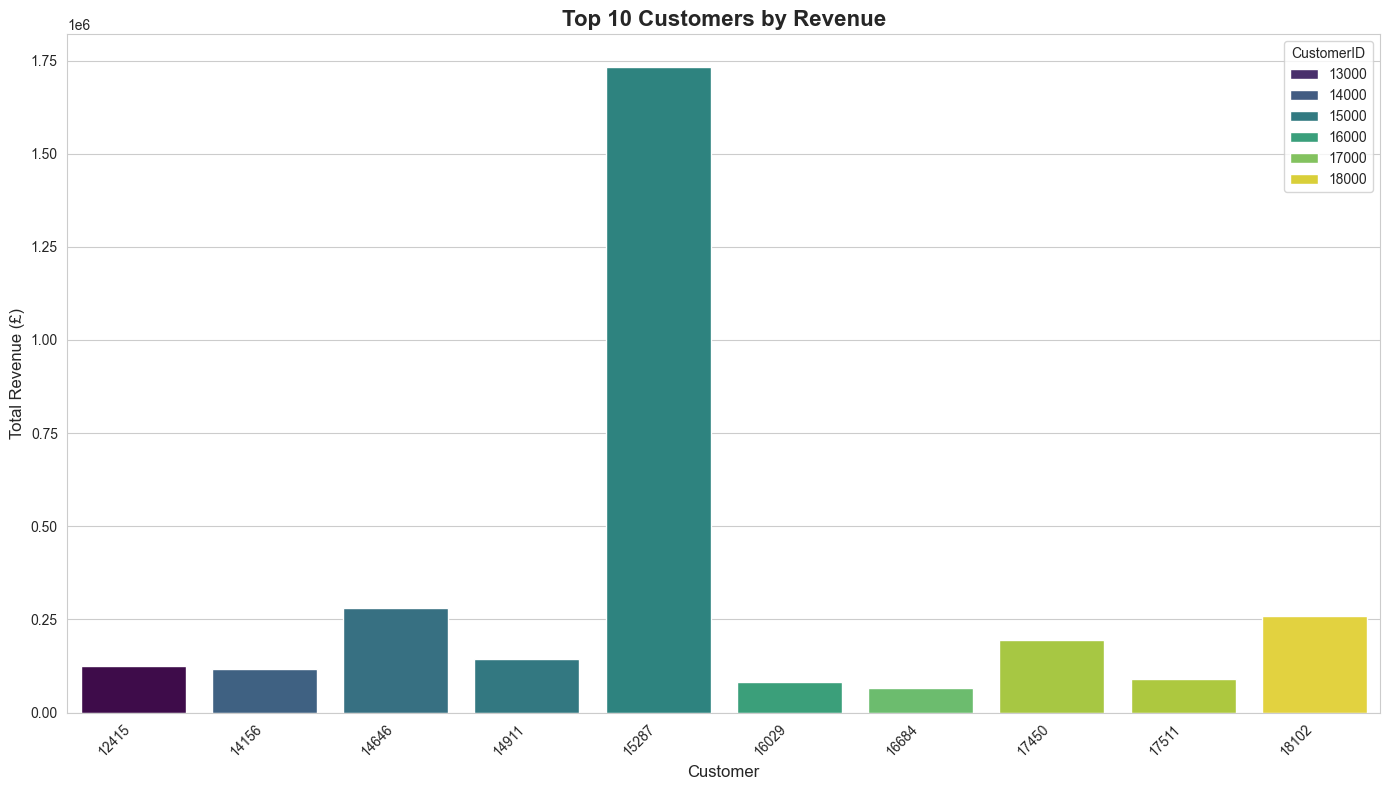

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top Customers by revenue
df_topcustomers = df_sales.groupby('CustomerID').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).rename(columns={'InvoiceNo': 'Transaction_Count'}).nlargest(15, 'Revenue')

# Top customers bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_topcustomers.reset_index().head(10),
    x='CustomerID', 
    y='Revenue',
    palette='viridis',
    hue='CustomerID',
)
plt.title('Top 10 Customers by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Total Revenue (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

RFM (Recency,Frequency,Monetary) Analysis

In [95]:
# Prepare customer data
customer_data = df_sales.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df_sales['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'
}).dropna()

# Create RFM scores
customer_data['R_Score'] = pd.qcut(customer_data['Recency'], 4, labels=[4, 3, 2, 1])
customer_data['F_Score'] = pd.qcut(customer_data['Frequency'], 4, labels=[1, 2, 3, 4])
customer_data['M_Score'] = pd.qcut(customer_data['Monetary'], 4, labels=[1, 2, 3, 4])

# Create segments
def segment_customer(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'VIP Customers'
    elif row['R_Score'] >= 2 and row['F_Score'] >= 2:
        return 'Loyal Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'At-Risk Customers'
    else:
        return 'Regular Customers'

customer_data['Segment'] = customer_data.apply(segment_customer, axis=1)



Customer segment analysis

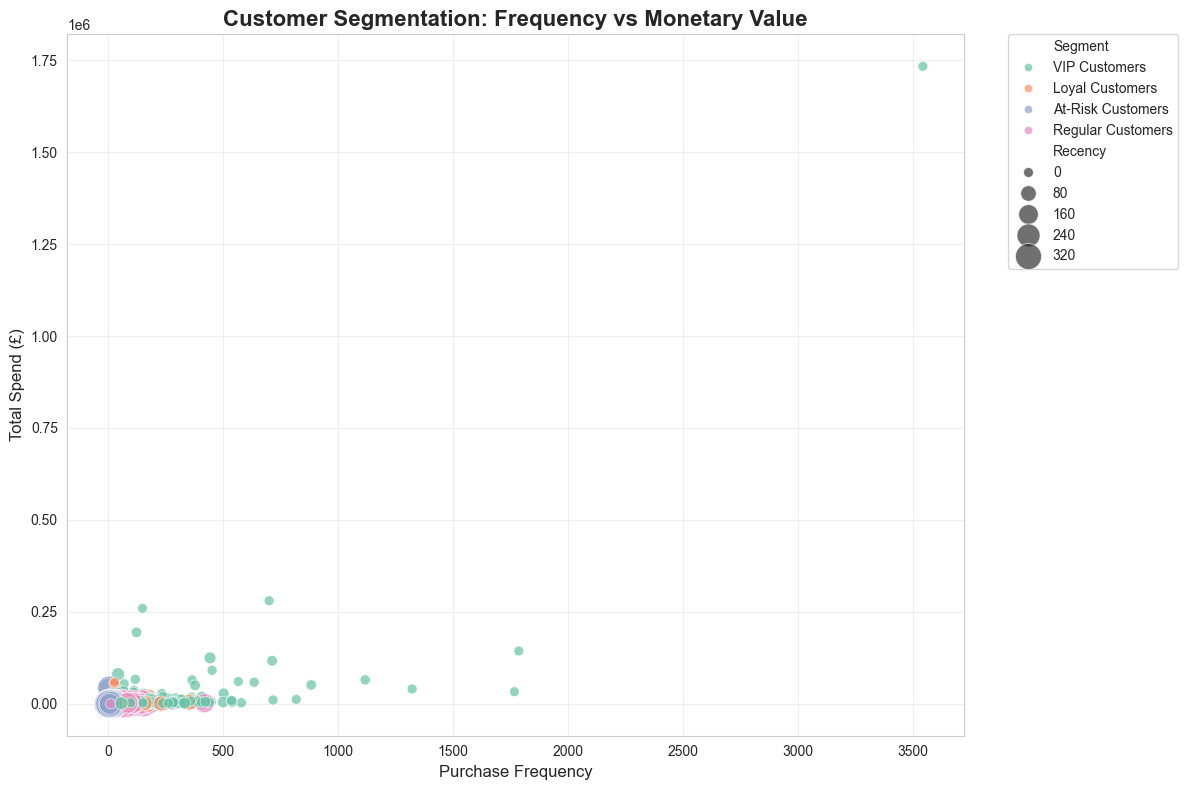


Dataset contains 4338 customers across 4 segments
Sample of customers shown:
   CustomerID            Segment  Frequency  Monetary  Recency
0       12347      VIP Customers        103   4310.00        1
1       12348    Loyal Customers         22   1797.24       74
2       12349      VIP Customers         73   1757.55       18
3       12350  At-Risk Customers         17    334.40      309
4       12352      VIP Customers         59   2506.04       35
5       12353  At-Risk Customers          4     89.00      203
6       12354  Regular Customers         58   1079.40      231
7       12355  At-Risk Customers         13    459.40      213
8       12356      VIP Customers         53   2811.43       22
9       12357      VIP Customers        131   6207.67       32


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reset index to make CustomerID a column for hover data
plot_data = customer_data.reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=plot_data,
    x='Frequency',
    y='Monetary',
    hue='Segment',
    size='Recency',
    sizes=(50, 400),  # Adjust size range as needed
    palette='Set2',    # Similar to px.colors.qualitative.Set2
    alpha=0.7
)

# Customize the plot
plt.title('Customer Segmentation: Frequency vs Monetary Value', fontsize=16, fontweight='bold')
plt.xlabel('Purchase Frequency', fontsize=12)
plt.ylabel('Total Spend (£)', fontsize=12)

# Improve legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

# Highlights
print(f"\nDataset contains {len(plot_data)} customers across {plot_data['Segment'].nunique()} segments")
print("Sample of customers shown:")
print(plot_data[['CustomerID', 'Segment', 'Frequency', 'Monetary', 'Recency']].head(10))

Customer Segment distribution

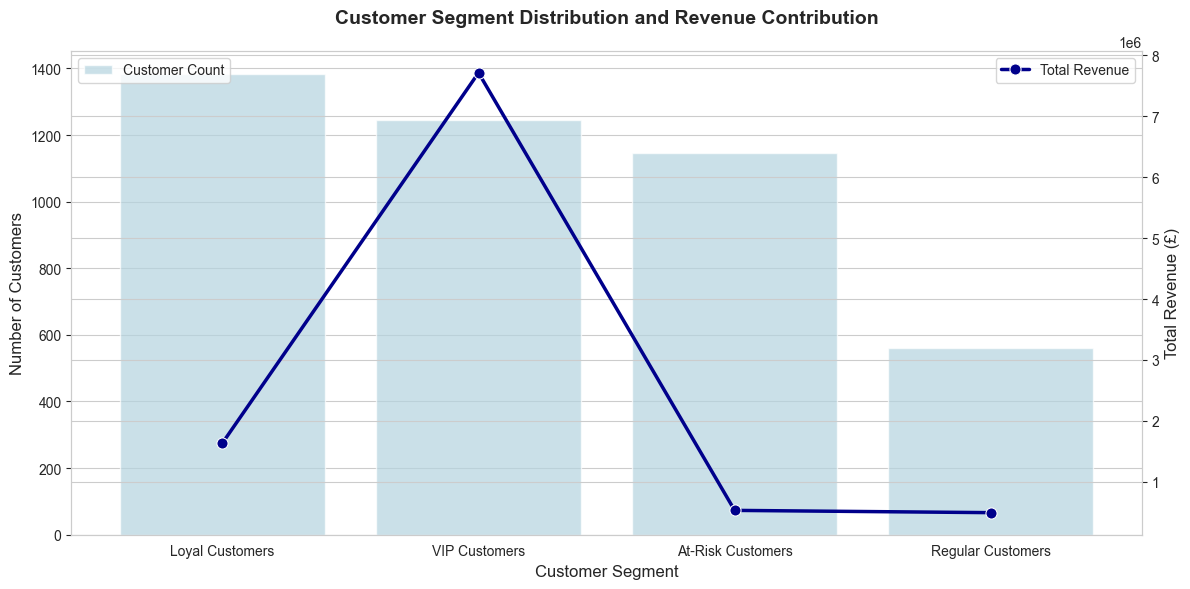


 Segment Summary:
Loyal Customers: 1384 customers, £1,635,598.13 revenue
VIP Customers: 1246 customers, £7,712,869.42 revenue
At-Risk Customers: 1147 customers, £531,574.12 revenue
Regular Customers: 561 customers, £494,291.81 revenue


In [98]:
# Segment distribution
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the data
segment_counts = customer_data['Segment'].value_counts()
segment_revenue = customer_data.groupby('Segment')['Monetary'].sum()

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for customer counts (left y-axis)
sns.barplot(
    x=segment_counts.index,
    y=segment_counts.values,
    ax=ax1,
    color='lightblue',
    alpha=0.7,
    label='Customer Count'
)

# Customize the first y-axis
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.set_xlabel('Customer Segment', fontsize=12)

# Create second y-axis for revenue
ax2 = ax1.twinx()

# Line plot for revenue (right y-axis)
sns.lineplot(
    x=segment_revenue.index,
    y=segment_revenue.values,
    ax=ax2,
    color='darkblue',
    marker='o',
    markersize=8,
    linewidth=2.5,
    label='Total Revenue'
)

# Customize the second y-axis
ax2.set_ylabel('Total Revenue (£)', fontsize=12)

# Set title
plt.title('Customer Segment Distribution and Revenue Contribution', 
          fontsize=14, fontweight='bold', pad=20)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Improve layout
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n Segment Summary:")
for segment in segment_counts.index:
    count = segment_counts[segment]
    revenue = segment_revenue[segment]
    print(f"{segment}: {count} customers, £{revenue:,.2f} revenue")

Customer Segment statistics

In [ ]:
# Segment statistics
segment_stats = customer_data.groupby('Segment').agg({
    'Monetary': ['count', 'sum', 'mean'],
    'Frequency': 'mean',
    'Recency': 'mean'
}).round(2)

print("Segment Statistics:")
print(segment_stats)

# Product Performance Analysis

C:\Users\Hp 2022\AppData\Local\Temp\ipykernel_22356\1438040321.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




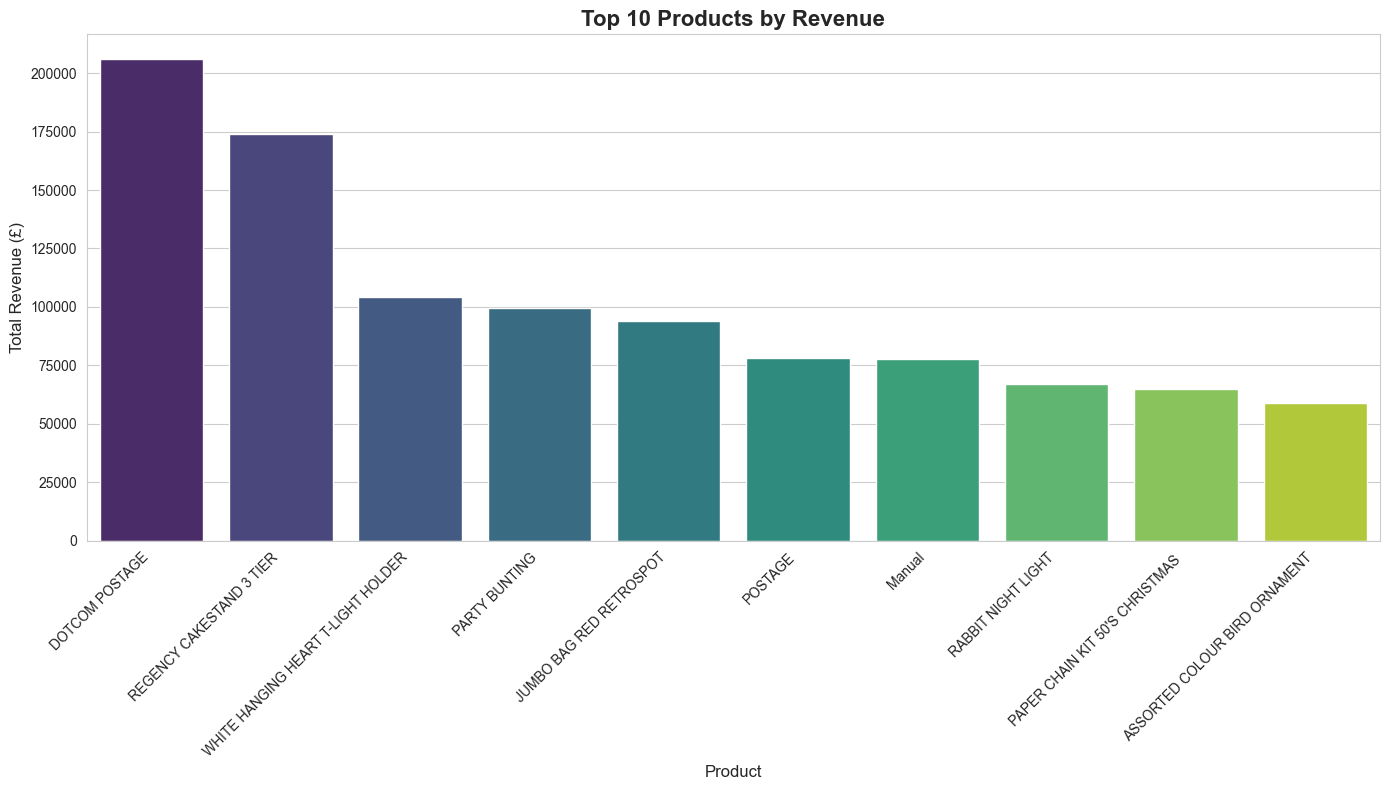

C:\Users\Hp 2022\AppData\Local\Temp\ipykernel_22356\1438040321.py:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




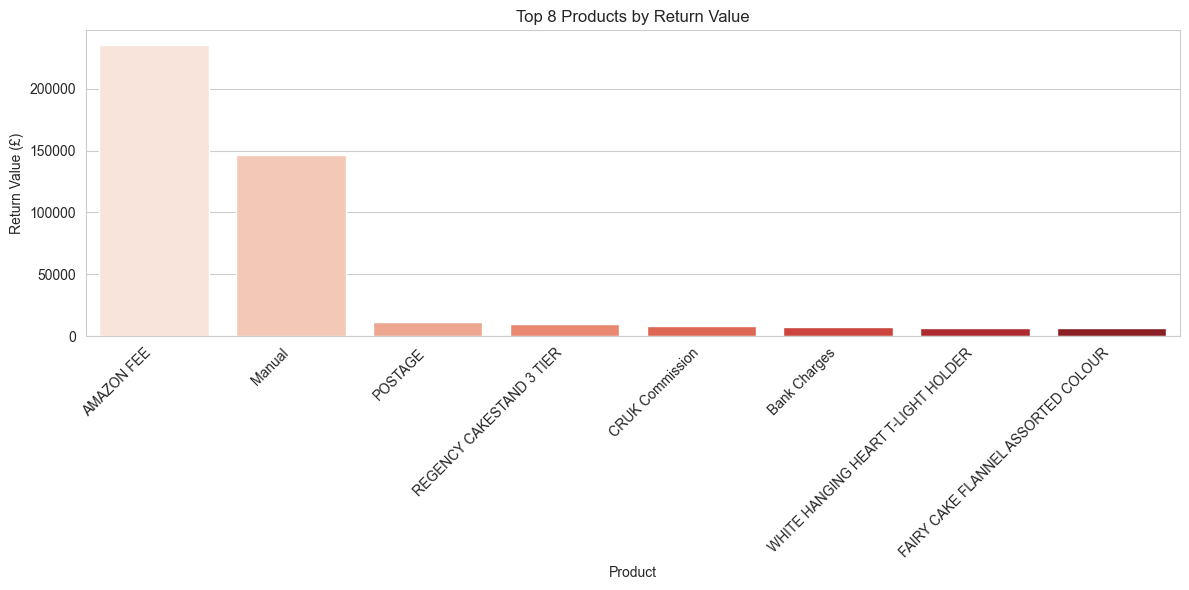

Treemap saved to insights/revenue_treemap.html
Top 15 products contribute £1,244,083.71 (12.0%) of total revenue
Top category 'Other' generates £6,413,809.69 in revenue


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

# Insights directory path
insights_path = os.path.join("..", "insights")

# Top products by revenue
top_products = df_sales.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).rename(columns={'InvoiceNo': 'Transaction_Count'}).nlargest(15, 'Revenue')

# Products with highest returns
return_products = df_returns.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).rename(columns={'Revenue': 'Return_Value', 'Quantity': 'Return_Quantity'})
return_products['Return_Value'] = abs(return_products['Return_Value'])
top_return_products = return_products.nlargest(10, 'Return_Value')

# Create simple product categories from descriptions
def get_category(description):
    desc_lower = str(description).lower()
    if any(word in desc_lower for word in ['bag', 'case', 'holder']):
        return 'Bags & Holders'
    elif any(word in desc_lower for word in ['light', 'lamp', 'candle']):
        return 'Lighting'
    elif any(word in desc_lower for word in ['vintage', 'retro']):
        return 'Vintage Items'
    elif any(word in desc_lower for word in ['kitchen', 'bottle', 'cup']):
        return 'Kitchenware'
    elif any(word in desc_lower for word in ['decoration', 'ornament']):
        return 'Home Decor'
    else:
        return 'Other'

df_sales['Category'] = df_sales['Description'].apply(get_category)
category_sales = df_sales.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

# Top products bar chart
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_products.reset_index().head(10),
    x='Description', 
    y='Revenue',
    palette='viridis',
    hue='Description'
)
plt.title('Top 10 Products by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Revenue (£)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Return analysis
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_return_products.reset_index().head(8),
    x='Description',
    y='Return_Value',
    palette='Reds',
    hue='Description'
)
plt.title('Top 8 Products by Return Value')
plt.xlabel('Product')
plt.ylabel('Return Value (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create Plotly treemap for categories
fig_treemap = px.treemap(
    df_sales.groupby('Category').agg({'Revenue': 'sum'}).reset_index(),
    path=['Category'],
    values='Revenue',
    title='Revenue Distribution by Product Category',
    color='Revenue',
    color_continuous_scale='Blues'
)
fig_treemap.update_layout(height=500)
# Save as HTML and open in browser
fig_treemap.write_html(os.path.join(insights_path, "revenue_treemap.html"))
print("Treemap saved to insights/revenue_treemap.html")



# Print key insights
print(f"Top 15 products contribute £{top_products['Revenue'].sum():,.2f} ({top_products['Revenue'].sum()/df_sales['Revenue'].sum()*100:.1f}%) of total revenue")
print(f"Top category '{category_sales.index[0]}' generates £{category_sales.iloc[0]:,.2f} in revenue")

# Suggestions for Further Improvements:
- The products DOTCOM POSTAGE and POSTAGE contribute a significant portion of total sales volume. However, it’s unclear whether they should be classified as actual sales for analytical purposes.
- Additionally, items such as Returns, Amazon Fee, Bank Charges, CRUK Commission, and Postage are currently included in the return data. Since these represent business expenses rather than true returns, they should be excluded from the return analysis for more accurate insights.
-  Improve product categorization, as many items are currently grouped under the OTHER category, which limits the clarity and accuracy of the analysis.